## 0 - Import the neccesary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import binom, norm, shapiro, levene , ttest_1samp, norm, pearsonr, wilcoxon, mannwhitneyu
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats import multitest as smt
import missingno as msno
from IPython.display import Image
%matplotlib inline 



## 1 - Datasets

### Introduction to swimming data
The data is about the swimming races from the 2015 and 2013 FINA World Championships

**Some Introductory Information**

- Races are typically swum in lanes one through eight. 
- The pool is 50 meters long, so in events longer than 50 meters, the swimmers turn around at the ends of the pool. Each 50m Stage is numbered in order and called "split"

- Strokes at the World Championships
  - Freestyle
  - Breaststroke
  - Butterfly
  - Backstroke
- Events at the World Championships.
  - Defined by gender, distance, stroke
- Rounds of events.
  - Heats: First round
  - Semifinals: Penultimate round in some events
  - Finals: The final round; the winner is the champion
  - For longer events we have Heats: First round, Finals: The final round
  - For shorter events we have Heats: First round, Semifinals: Penultimate round, Finals: The final round
- Data source
  - Data is freely available from [OMEGA](https://www.omegatiming.com/)
- Domain-specific knowledge
  - Required

In [2]:
fina_2015=pd.read_csv(r'.\Data\2015_FINA.csv', skiprows=4)
fina_2013=pd.read_csv(r'.\Data\2013_FINA.csv', skiprows=4)
pd.set_option('display.max_columns', None)

In [3]:
fina_2015.head()

,athleteid,lastname,firstname,birthdate,gender,name,code,eventid,heat,lane,points,reactiontime,swimtime,split,cumswimtime,splitdistance,daytime,round,distance,relaycount,stroke,splitswimtime
0,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,1,1,4,680.0,0.77,63.65,1,29.63,50,930.0,PRE,100,1,FLY,29.63
1,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,1,1,4,680.0,0.77,63.65,2,63.65,100,930.0,PRE,100,1,FLY,34.02
2,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,20,1,8,654.0,0.80,140.28,1,31.33,50,1014.0,PRE,200,1,FLY,31.33
3,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,20,1,8,654.0,0.80,140.28,2,66.81,100,1014.0,PRE,200,1,FLY,35.48
4,100784,BORSHI,NOEL,1996-02-13,F,Albania,ALB,20,1,8,654.0,0.80,140.28,3,103.29,150,1014.0,PRE,200,1,FLY,36.48


In [4]:
fina_2013.head()

,athleteid,lastname,firstname,birthdate,gender,name,code,eventid,heat,lane,points,reactiontime,swimtime,split,cumswimtime,splitdistance,daytime,round,distance,relaycount,stroke,splitswimtime
0,244414,KASHARI,ANXHELA,1996-01-01,F,ALBANIA,ALB,33,4,1,578.0,0.68,28.48,1,28.48,50,1000.0,PRE,50,1,FREE,28.48
1,244417,BORSHI,NOEL,1996-01-01,F,ALBANIA,ALB,1,2,3,591.0,0.73,66.77,1,30.84,50,1000.0,PRE,100,1,FLY,30.84
2,244417,BORSHI,NOEL,1996-01-01,F,ALBANIA,ALB,1,2,3,591.0,0.73,66.77,2,66.77,100,1000.0,PRE,100,1,FLY,35.93
3,244421,ZEKTHI,EVIN,1996-01-01,M,ALBANIA,ALB,12,1,4,607.0,0.70,120.43,1,27.67,50,1047.0,PRE,200,1,FREE,27.67
4,244421,ZEKTHI,EVIN,1996-01-01,M,ALBANIA,ALB,12,1,4,607.0,0.70,120.43,2,58.12,100,1047.0,PRE,200,1,FREE,30.45


## 2 - Validation

### 2.1 lenght and info of the datasets

#### a) fina 2015

In [5]:
len(fina_2015)

11423

In [6]:
fina_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11423 entries, 0 to 11422
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   athleteid      11423 non-null  int64  
 1   lastname       11420 non-null  object 
 2   firstname      11423 non-null  object 
 3   birthdate      11423 non-null  object 
 4   gender         11423 non-null  object 
 5   name           11423 non-null  object 
 6   code           11423 non-null  object 
 7   eventid        11423 non-null  int64  
 8   heat           11423 non-null  int64  
 9   lane           11423 non-null  int64  
 10  points         11352 non-null  float64
 11  reactiontime   11362 non-null  float64
 12  swimtime       11364 non-null  float64
 13  split          11423 non-null  int64  
 14  cumswimtime    11364 non-null  float64
 15  splitdistance  11423 non-null  int64  
 16  daytime        11423 non-null  float64
 17  round          11423 non-null  object 
 18  distan

In [7]:
fina_2015.heat.value_counts()

heat
1     3181
2     2297
3     1838
4     1561
5     1317
6      439
7      386
8      167
9      100
10      58
11      40
12      39
Name: count, dtype: int64

In [8]:
fina_2015.stroke.value_counts()

stroke
FREE      6782
MEDLEY    1288
BREAST    1205
FLY       1095
BACK      1053
Name: count, dtype: int64

In [9]:
fina_2015.distance.value_counts()

distance
200     2944
1500    2554
400     1805
100     1659
800     1601
50       860
Name: count, dtype: int64

In [10]:
fina_2015['round'].value_counts()

round
PRE    8904
FIN    1475
SEM    1022
SOS      18
SOP       4
Name: count, dtype: int64

In [11]:
fina_2015['split'].value_counts()

split
1     2865
2     1960
3     1144
4     1144
5      410
6      410
7      410
8      410
13     185
15     185
14     185
16     185
12     185
10     185
9      185
11     185
24      85
29      85
28      85
27      85
26      85
25      85
22      85
23      85
21      85
20      85
19      85
18      85
17      85
30      85
Name: count, dtype: int64

#### b) Fina 2013

In [12]:
len(fina_2013)

9967

In [13]:
fina_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9967 entries, 0 to 9966
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   athleteid      9967 non-null   int64  
 1   lastname       9967 non-null   object 
 2   firstname      9967 non-null   object 
 3   birthdate      9967 non-null   object 
 4   gender         9967 non-null   object 
 5   name           9967 non-null   object 
 6   code           9967 non-null   object 
 7   eventid        9967 non-null   int64  
 8   heat           9967 non-null   int64  
 9   lane           9967 non-null   int64  
 10  points         9914 non-null   float64
 11  reactiontime   9926 non-null   float64
 12  swimtime       9928 non-null   float64
 13  split          9967 non-null   int64  
 14  cumswimtime    9928 non-null   float64
 15  splitdistance  9967 non-null   int64  
 16  daytime        9358 non-null   float64
 17  round          9967 non-null   object 
 18  distance

In [14]:
fina_2013.heat.value_counts()

heat
1     3218
2     2283
3     1792
4     1525
5      520
6      258
7      180
8      110
9       60
10      10
11      10
0        1
Name: count, dtype: int64

In [15]:
fina_2013.stroke.value_counts()

stroke
FREE      5748
MEDLEY    1250
BREAST    1093
FLY        949
BACK       927
Name: count, dtype: int64

In [16]:
fina_2013.distance.value_counts()

distance
200     2630
1500    2220
400     1491
100     1417
800     1409
50       800
Name: count, dtype: int64

In [17]:
fina_2013['round'].value_counts()

round
PRE    7433
FIN    1504
SEM    1024
SOP       6
Name: count, dtype: int64

In [18]:
fina_2013['split'].value_counts()

split
1     2529
2     1708
3     1004
4     1002
5      348
6      348
7      348
8      348
13     162
15     162
14     162
16     162
12     162
10     162
9      162
11     162
24      74
29      74
28      74
27      74
26      74
25      74
22      74
23      74
21      74
20      74
19      74
18      74
17      74
30      74
Name: count, dtype: int64

### 2.1 - Null values 

#### a) Fina 2015

In [19]:
fina_2015.isna().sum()

athleteid         0
lastname          3
firstname         0
birthdate         0
gender            0
name              0
code              0
eventid           0
heat              0
lane              0
points           71
reactiontime     61
swimtime         59
split             0
cumswimtime      59
splitdistance     0
daytime           0
round             0
distance          0
relaycount        0
stroke            0
splitswimtime    59
dtype: int64

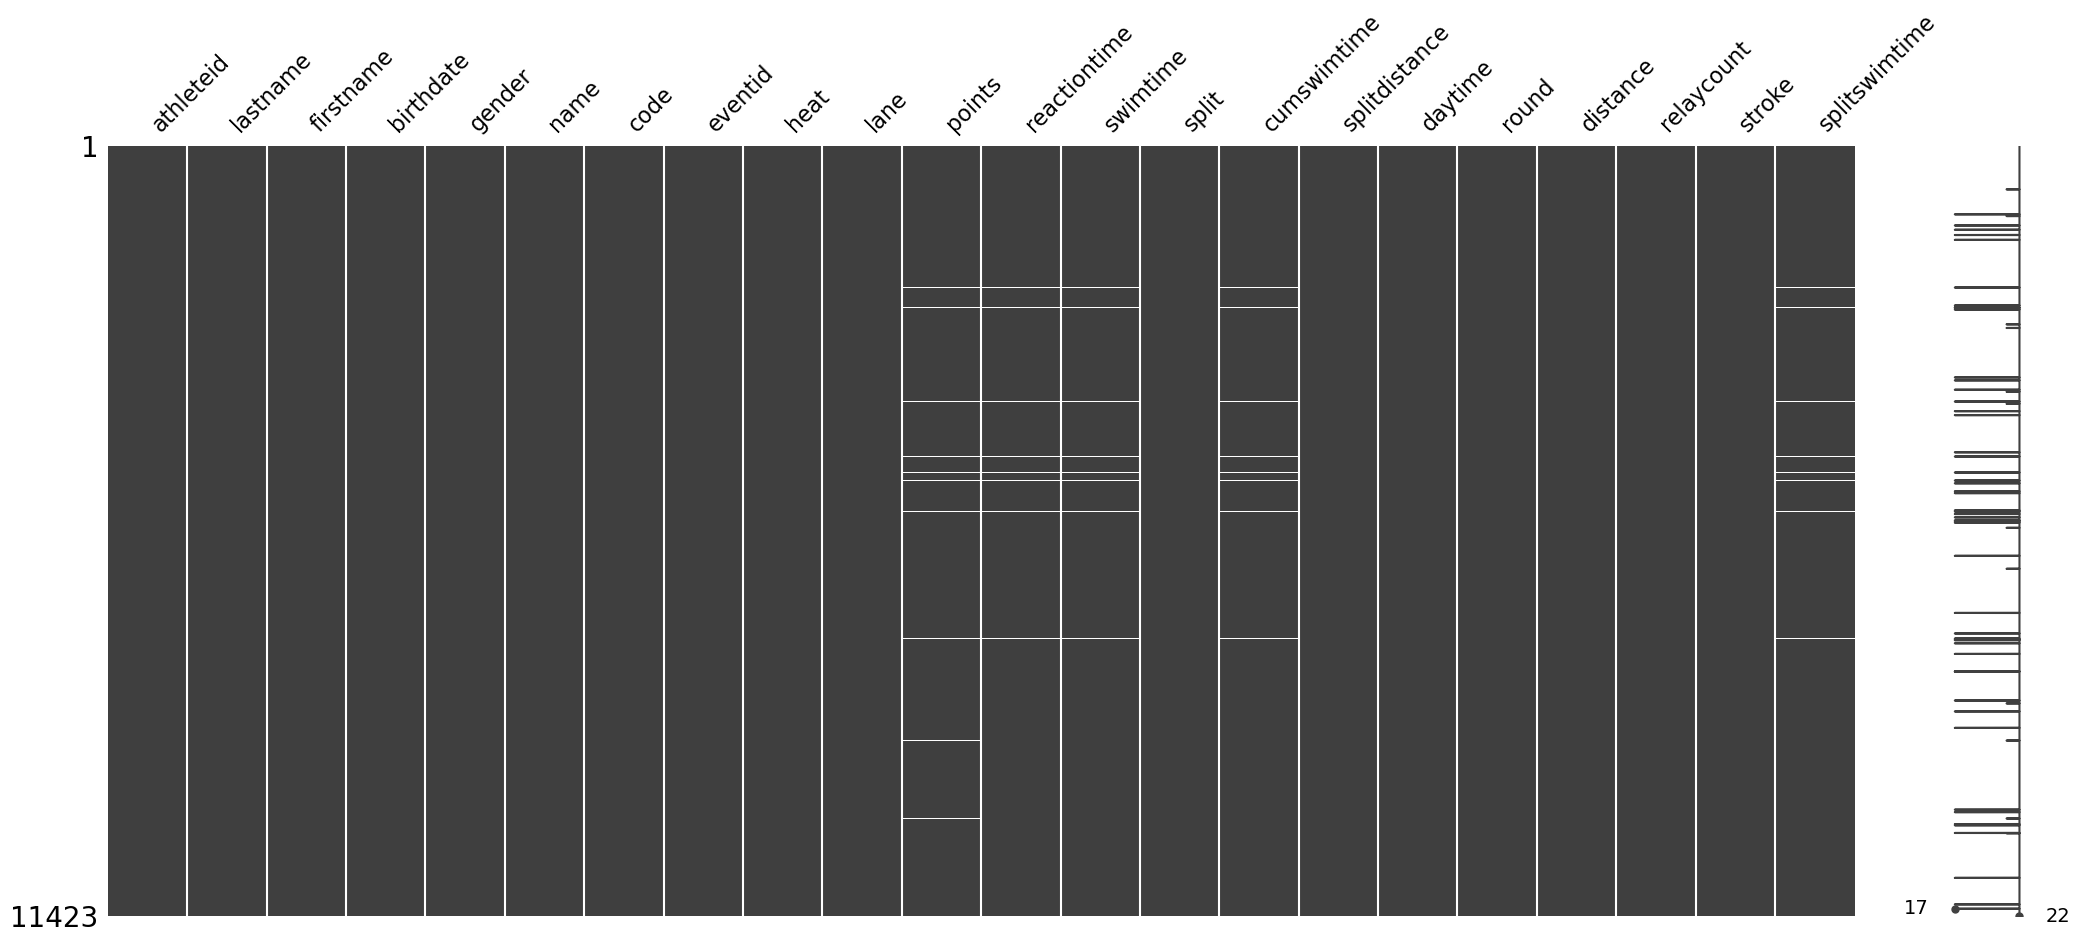

In [20]:
msno.matrix(fina_2015)
plt.show()

**We can observe that the null values are correlated**  
We can check it with a heatmap of correlation of the null values 

<Axes: >

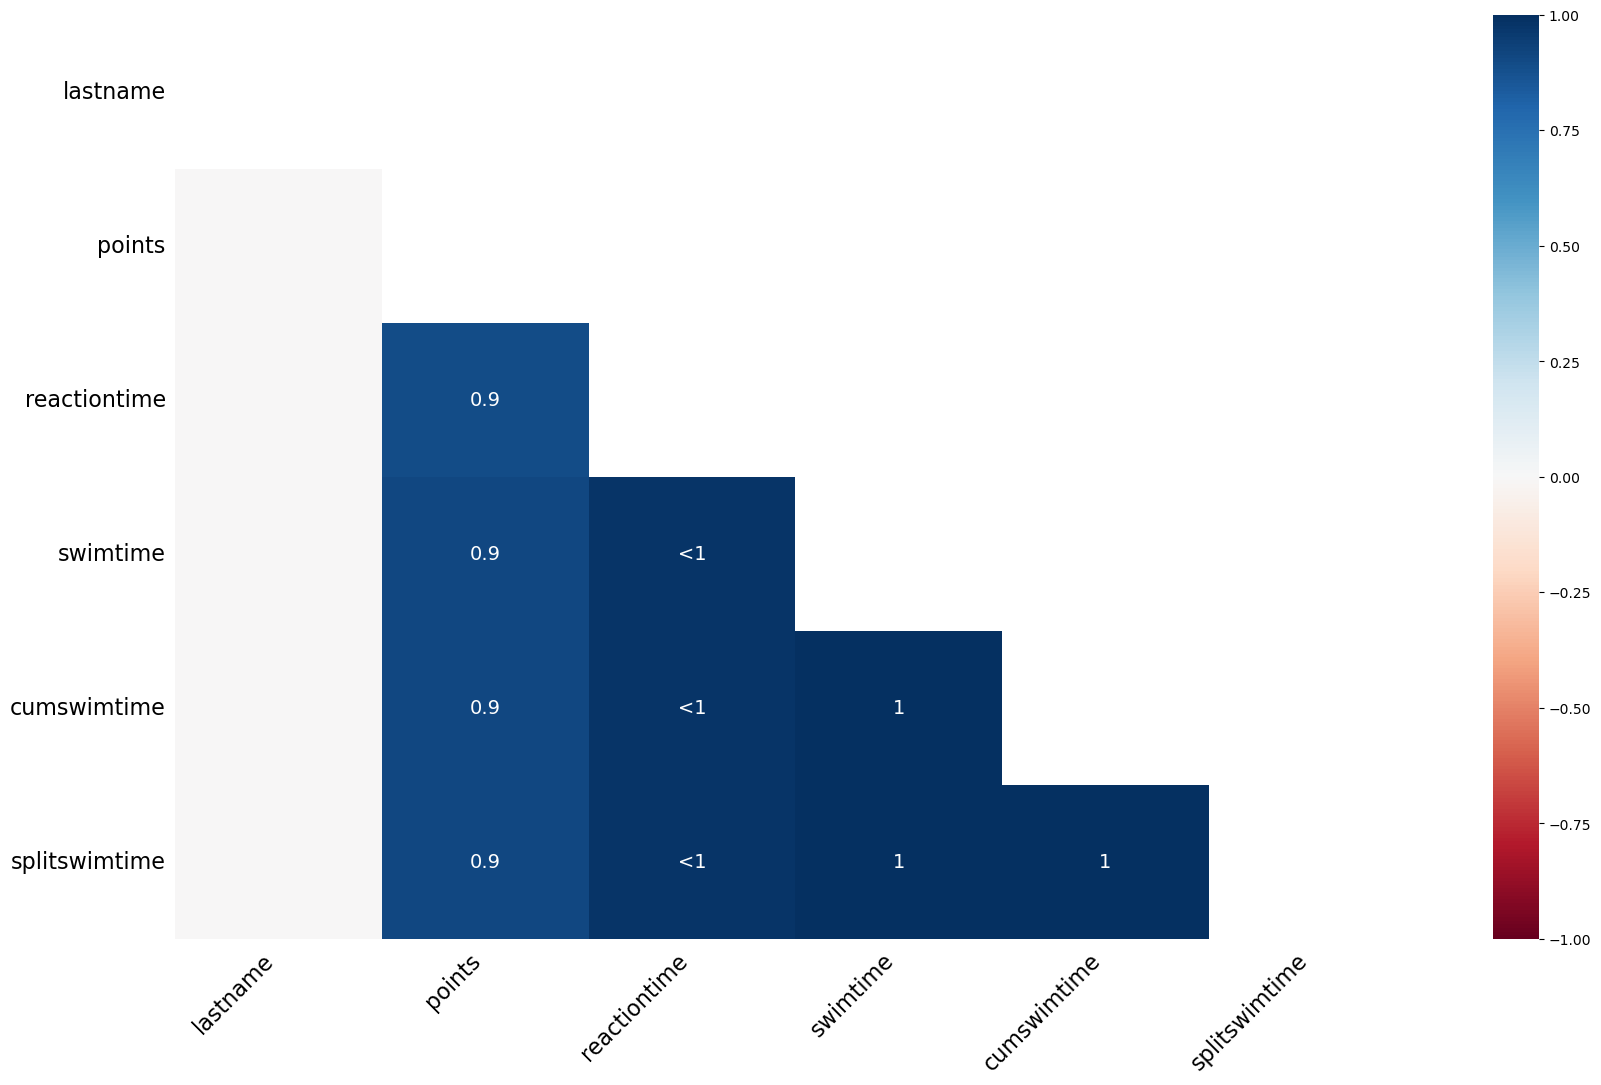

In [21]:
msno.heatmap(fina_2015)

In [22]:
fina_2015[fina_2015.isnull().any(axis=1)]

,athleteid,lastname,firstname,birthdate,gender,name,code,eventid,heat,lane,points,reactiontime,swimtime,split,cumswimtime,splitdistance,daytime,round,distance,relaycount,stroke,splitswimtime
643,110900,TREFFERS,BEN,1991-08-15,M,Australia,AUS,210,2,8,NaN,0.71,54.50,1,54.50,50,1748.0,SEM,100,1,BACK,54.50
1013,101114,CROENEN,LOUIS,1994-01-04,M,Belgium,BEL,30,4,8,NaN,NaN,NaN,1,NaN,50,1009.0,PRE,100,1,FLY,NaN
1039,121185,SEIBOU,LARAIBA,2000-12-06,F,Benin,BEN,36,2,7,NaN,0.88,47.47,1,47.47,50,1008.0,PRE,50,1,BREAST,47.47
1178,100523,CIELO FILHO,CESAR,1987-01-10,M,Brazil,BRA,28,12,3,NaN,NaN,NaN,1,NaN,50,930.0,PRE,50,1,FREE,NaN
1242,100891,PEREIRA,THIAGO,1986-01-26,M,Brazil,BRA,30,6,1,NaN,NaN,NaN,1,NaN,50,1009.0,PRE,100,1,FLY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,102511,AL BESHR,MUBARAK MOHAMED SALEM YOU,1988-07-15,M,United Arab Emirates,UAE,14,5,4,NaN,NaN,NaN,1,NaN,50,930.0,PRE,50,1,BREAST,NaN
10194,113324,ALSHAMSI,ALIA ALI ABDULLA MAJED,2000-05-02,F,United Arab Emirates,UAE,11,1,9,NaN,0.74,101.02,1,101.02,50,1007.0,PRE,100,1,BREAST,101.02
10856,105635,BOOTSMA,RACHEL,1993-12-15,F,United States,USA,18,4,3,NaN,NaN,NaN,1,NaN,50,930.0,PRE,50,1,BACK,NaN
11249,108087,SUBIRATS,ALBERT,1986-09-25,M,Venezuela,VEN,10,4,2,NaN,NaN,NaN,1,NaN,50,949.0,PRE,100,1,BACK,NaN


**Testing several examples I conclude that the null values are related to athetles who don't made points in a particular round, were desqualified or even didn't even advance to it**

#### b) FINA 2013

In [23]:
fina_2013.isnull().sum()

athleteid          0
lastname           0
firstname          0
birthdate          0
gender             0
name               0
code               0
eventid            0
heat               0
lane               0
points            53
reactiontime      41
swimtime          39
split              0
cumswimtime       39
splitdistance      0
daytime          609
round              0
distance           0
relaycount         0
stroke             0
splitswimtime     39
dtype: int64

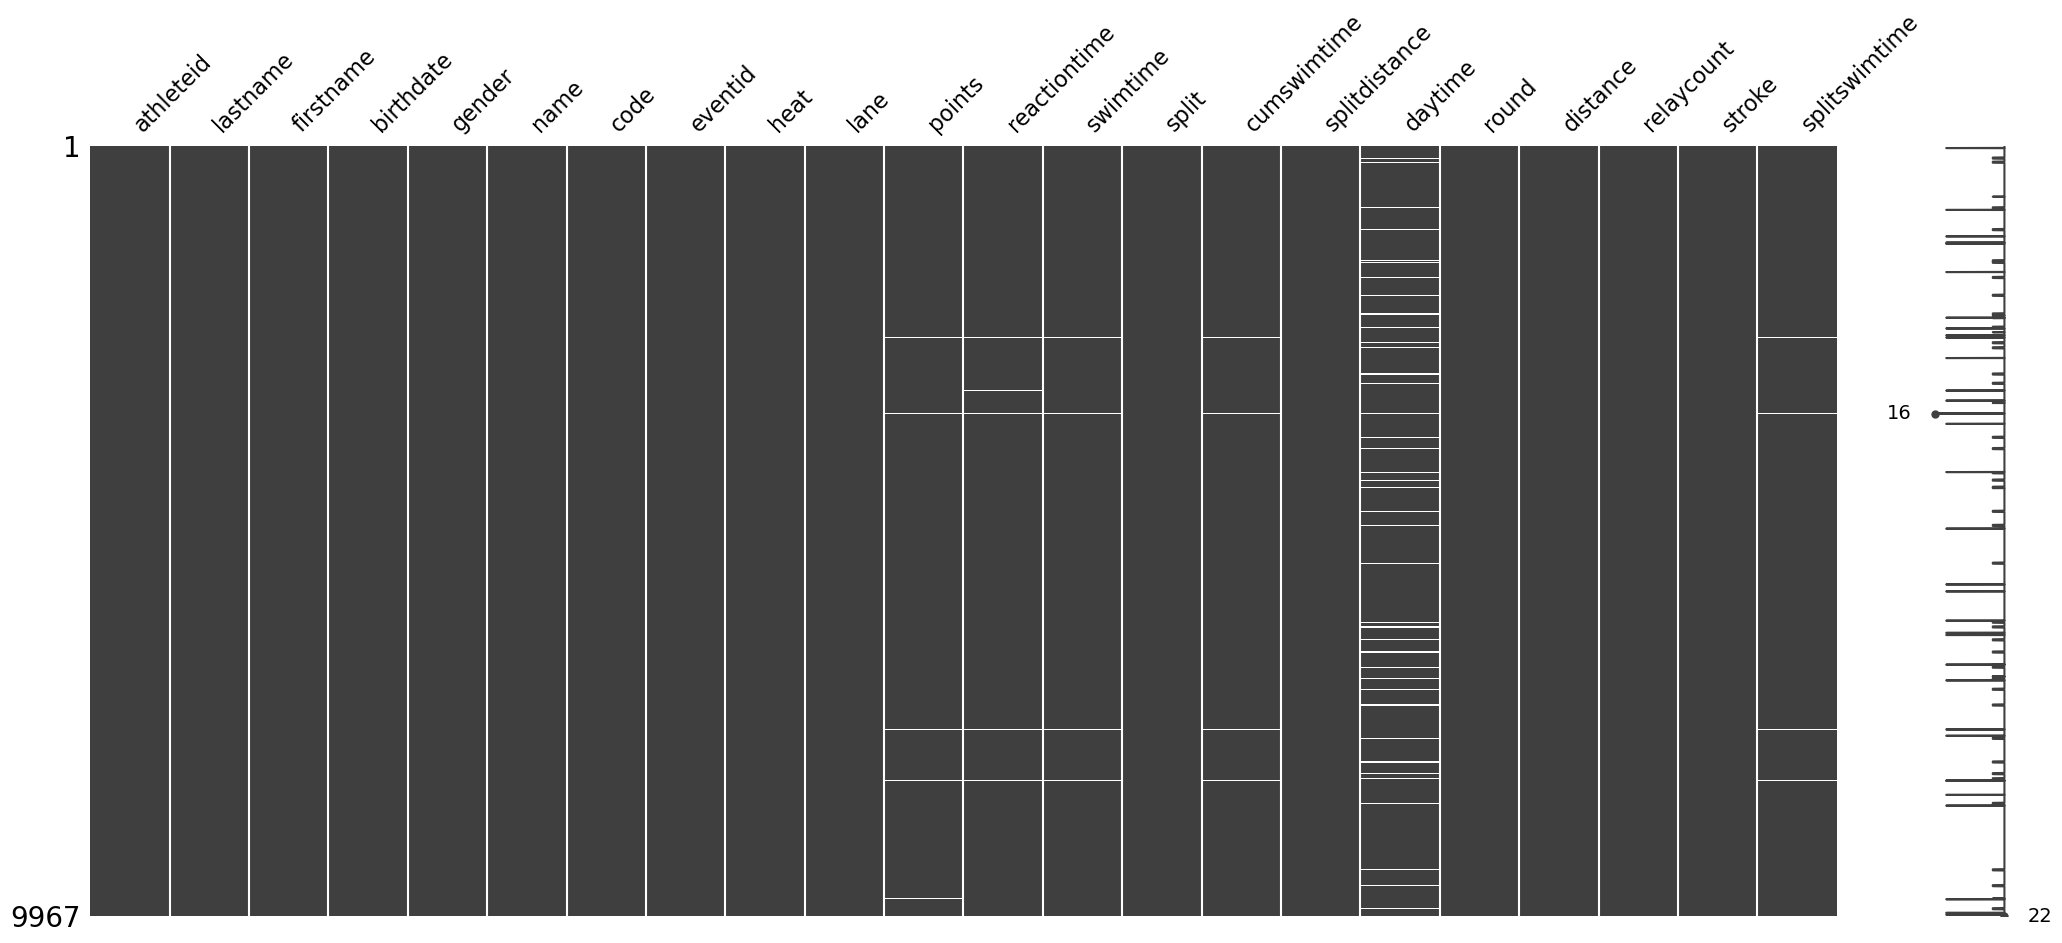

In [24]:
msno.matrix(fina_2013)
plt.show()

**We also can observe that the null values are correlated**  
We can check it with a heatmap of correlation of the null values 

<Axes: >

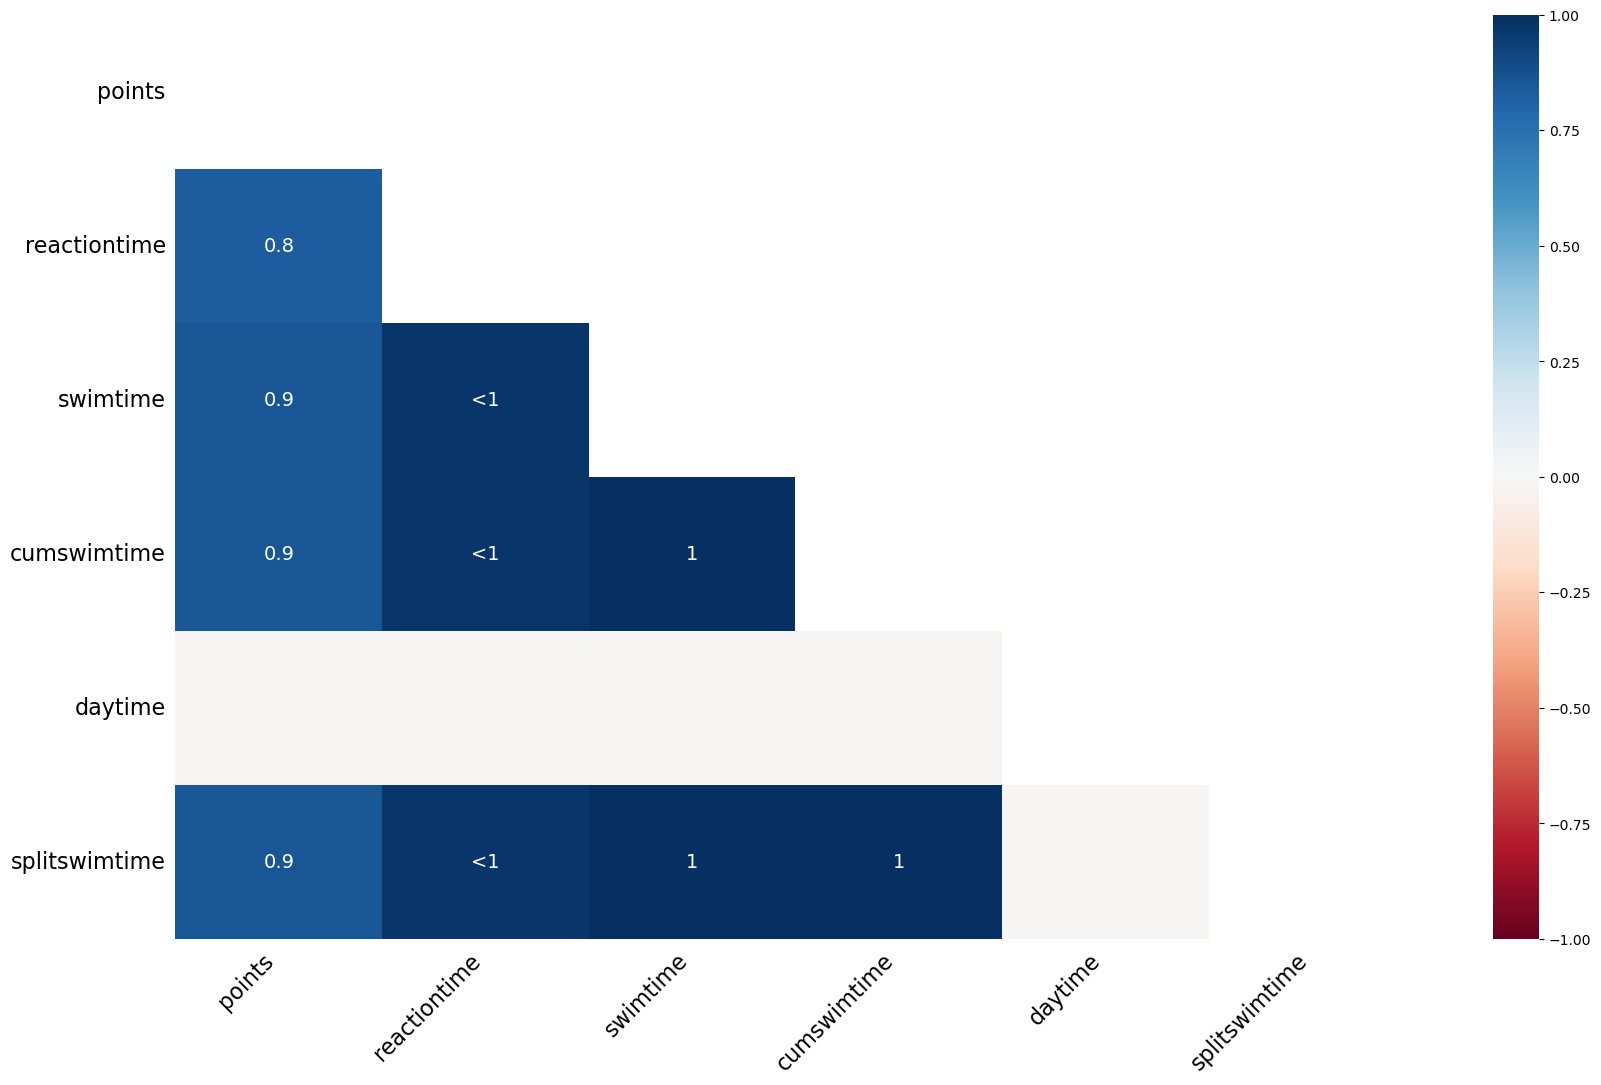

In [25]:
msno.heatmap(fina_2013)

**Except for daytime all the missing values are greatly correlated**
**Testing several examples, as in the 2015 FINA data, I conclude that the null values are related to athetles who don't made points in a particular round, were desqualified or even didn't even advance to it**

## 4 -  Do the swimmers goes faster in the finals ?

### 4.1 Problem statement

**Question : Do swimmers swim faster in the finals than in other rounds?**  

We are going to use the FINA 2015 data

- Individual swimmers, or the whole field? 
    - We have to compare the same swimmer, in the same style in different stages. In that way we can appreciate the differente of swimming times against themselves.
- Faster than heats? Faster than semifinals?
    - A problem is that elite swimmers sometimes do not give everything they have in the heats because the competition is weak and they want to have more energy for the finals. So, a better comparison is for individual swimmers between semifinals to finals
- For what strokes? For what distances?
    - Finally, do we want to make this comparison for a given stroke, or for all strokes together? And for what distances? So, we see that posing the statistical question is a crucial, and sometimes difficult, first step in an analysis. Let's be more specific in our question, then.

**Specific questions**
- Do individual male swimmers swim faster in the finals compared to the semifinals? Implicit in this question is that we will include all events that have semifinals, which are the shorter distance events in each of the strokes?
- Metric to use? 
    * A reasonable metric is the *fractional improvement* from the semifinals to the finals. By normalizing the difference in time by the semifinal time, we mitigate the effects of different strokes and different distances.
    $$ f = \frac{\text{semifinals time} - \text{finals time}}{\text{semifinals time}} $$
​   
 



### 4.2 Data preparation

In [26]:
df_H1 = fina_2015[(fina_2015['gender'] == "M") & 
                     (fina_2015['stroke'] != "MEDLEY") & 
                     (fina_2015['distance'].isin([100, 50, 200])) & 
                     (fina_2015['round'].isin(['SEM', 'FIN'])) & 
                     (fina_2015['splitdistance'] == fina_2015['distance'])]
df_H1.head(n = 5)

,athleteid,lastname,firstname,birthdate,gender,name,code,eventid,heat,lane,points,reactiontime,swimtime,split,cumswimtime,splitdistance,daytime,round,distance,relaycount,stroke,splitswimtime
200,102312,GRABICH,FEDERICO,1990-03-26,M,Argentina,ARG,212,1,8,855.0,0.64,107.43,4,107.43,200,1842.0,SEM,200,1,FREE,27.50
204,102312,GRABICH,FEDERICO,1990-03-26,M,Argentina,ARG,219,1,5,921.0,0.66,48.20,2,48.20,100,1732.0,SEM,100,1,FREE,25.08
206,102312,GRABICH,FEDERICO,1990-03-26,M,Argentina,ARG,119,1,3,926.0,0.67,48.12,2,48.12,100,1805.0,FIN,100,1,FREE,25.10
282,100529,LARKIN,MITCHELL,1993-07-09,M,Australia,AUS,210,2,4,975.0,0.67,52.38,2,52.38,100,1748.0,SEM,100,1,BACK,27.10
284,100529,LARKIN,MITCHELL,1993-07-09,M,Australia,AUS,110,1,4,973.0,0.57,52.40,2,52.40,100,1836.0,FIN,100,1,BACK,26.99


In [27]:
# I Filter the data in order to have only final and semifinal times
df_H1_fin = df_H1.loc[(df_H1['round'] == 'FIN')]
df_H1_sem = df_H1.loc[(df_H1['round'] == 'SEM')]

# I perform a self join in order to have the times of the same athletes on the finals and semifinals by stroke and distance
df = df_H1_fin.merge(df_H1_sem, how = 'left', on = ['athleteid', 'stroke', 'distance', 'lastname'])

# Rename of some joined columns for clarity and filter of the data by just the cols I need
df = df.rename(index = str, columns = {"cumswimtime_x" : "final_swimtime", "cumswimtime_y" : "semi_swimtime"})
df = df[['athleteid', 'stroke', 'distance', 'lastname', 'final_swimtime', 'semi_swimtime']]

In [28]:
df['f'] = (df['semi_swimtime'] - df['final_swimtime']) / df['semi_swimtime']

In [29]:
df.head()

,athleteid,stroke,distance,lastname,final_swimtime,semi_swimtime,f
0,102312,FREE,100,GRABICH,48.12,48.20,0.001660
1,100529,BACK,100,LARKIN,52.40,52.38,-0.000382
2,100529,BACK,200,LARKIN,113.58,114.29,0.006212
3,100529,BACK,50,LARKIN,24.70,24.65,-0.002028
4,100864,FREE,200,MCEVOY,107.26,106.09,-0.011028


### 4.3 EDA

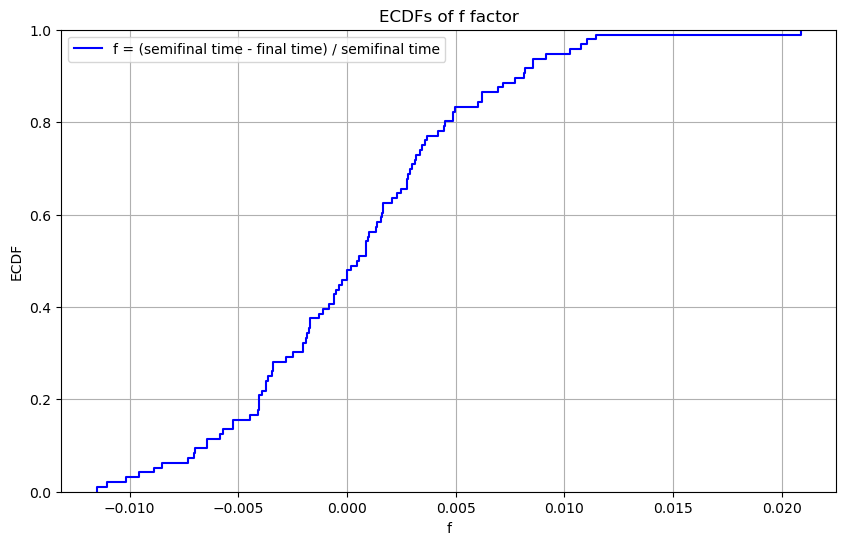

In [30]:
# ECDF
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df['f'], label='f = (semifinal time - final time) / semifinal time',c='blue')
plt.ylabel('ECDF')
plt.legend()
plt.title('ECDFs of f factor')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

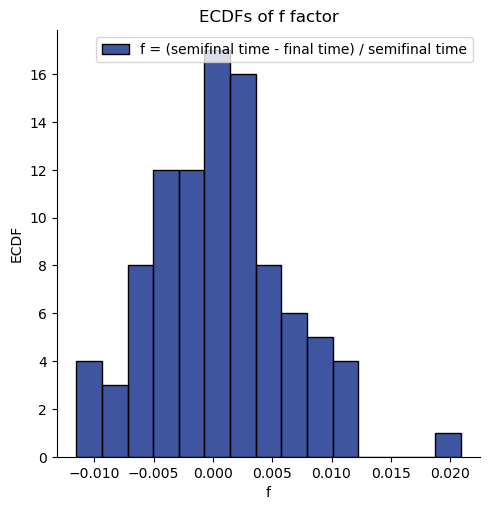

In [31]:
# Histogram
plt.figure(figsize=(10, 6))
sns.set_palette("dark")
sns.displot(data=df['f'], label='f = (semifinal time - final time) / semifinal time',bins=15)
plt.ylabel('ECDF')
plt.legend()
plt.title('ECDFs of f factor')
plt.show()

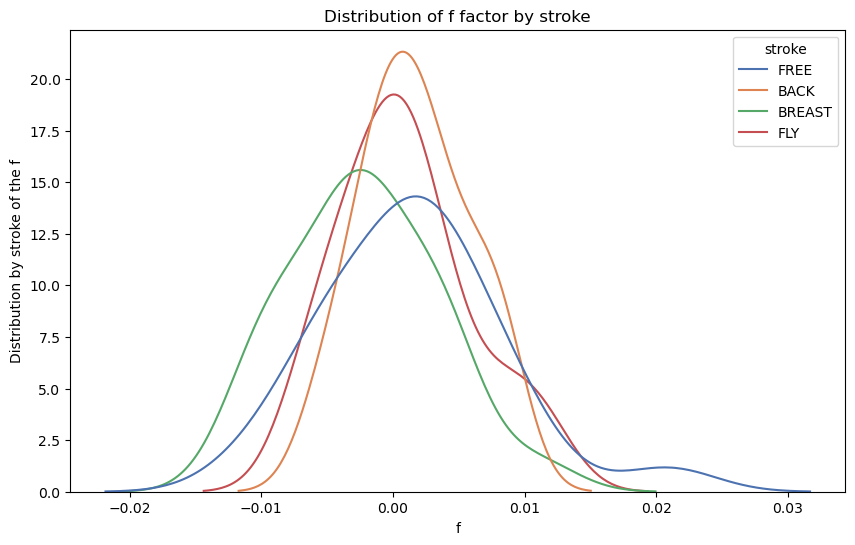

In [32]:
# Distribution plots by stroke
plt.figure(figsize=(10, 6))
sns.set_palette("deep")
# sns.plot(data=df,y='f',x='stroke')
sns.kdeplot(data=df,x='f',hue='stroke')
plt.ylabel('Distribution by stroke of the f')
plt.title('Distribution of f factor by stroke')
plt.show()

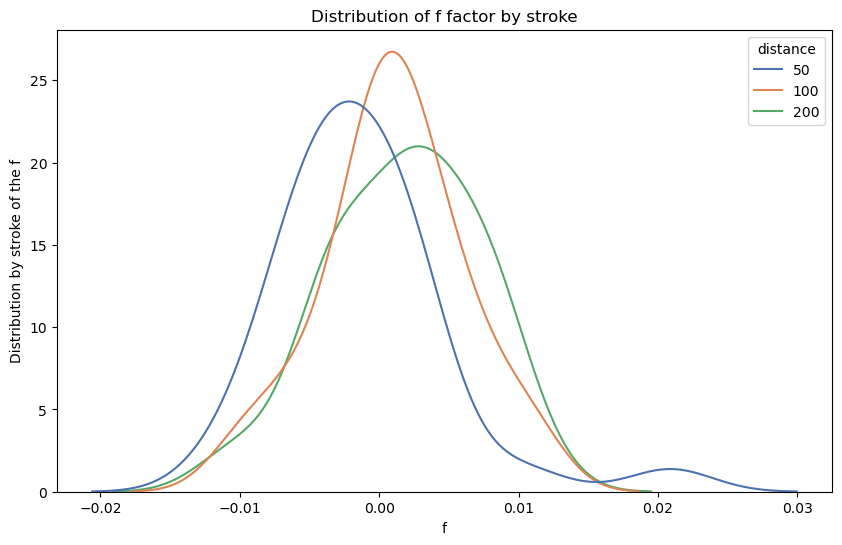

In [33]:
# Distribution plots by distance
plt.figure(figsize=(10, 6))
# sns.plot(data=df,y='f',x='stroke')
sns.kdeplot(data=df,x='f',hue='distance',palette='deep')
plt.ylabel('Distribution by stroke of the f')
plt.title('Distribution of f factor by stroke')
plt.show()

Seeing the graphs it doesn't appear that the semifinal and final times have a significan different (the f parameter ECDF and histograms does not show a marked skewed distributionmm)

### 4.4 Hyphotesis testing 

**Auxiliary functions**

In [34]:
def check_normality(data):
    test_stat_normality, p_value_normality=shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [35]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

**Hyphotesis Formulation**

**Ho:** The mean of the f coefficient is smaller or equal than zero.

**H1:** The mean of the f coefficient is greater than zero (final times are shorter than semi final ones)

#### a) Method with the ttest_1samp

In [36]:
# First we check normality in order to know if we can apply a parametric test
check_normality(df['f'])

p value:0.2757
Fail to reject null hypothesis >> The data is normally distributed


In [37]:
test = ttest_1samp(df['f'],0)
p_value_1samp = test.pvalue

print(f"p value: {round(p_value_1samp/2,3)}")

if p_value_1samp <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value: 0.201
Fail to reject null hypothesis


#### b) Method with bootstraping and z-score

In [38]:
# Hyphotesized statistic in Ho
hyp_stat=0

# Bootstraping of the mean
boots=[]
for i in range(10000):
    boots.append(np.mean(df['f'].sample(frac=1,replace=True)))

boot_dist=np.array(boots)

# standar error   
s=np.std(boot_dist,ddof=1)

# X (mean of the sample)
X=np.mean(df['f'])

In [39]:
z_score=(hyp_stat-X)/s
z_score

-0.8367812930662994

In [40]:
p_value= norm.cdf(z_score,0,1)

print(f"p value: {round(p_value,3)}")

if p_value_1samp <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value: 0.201
Fail to reject null hypothesis


In [41]:
conf_int = np.percentile(boot_dist,[2.5,97.5])
print(f'The 95% confidence interval is: {conf_int}')

The 95% confidence interval is: [-0.00065026  0.00159421]


##### **Conclusion:** The p value suggest that there is not significant difference between the times in the finals and semifinals for mens competitions in distances of 50,100 or 200m

## 5 -  Do the swimmers slow down in each split in longer distances?

### 5.1 Problem statement

Even though the competitors in the World Championships are elite athletes, they tire over the course of longer events.  
Recall that the swimming pool is 50 meters long. So, during the course of an 800 meter swim, a swimmer swims 16 lengths of the pool.  


![Fig 1 - Typical swimming path](\Data\fig_1.png)  
Fig 1 - Example of two swimming paths in the 800m distance.   

If we analyse the graphs perhaps the most striking feature of this plot is the very fast first split. This is because the first split is different from the rest. The swimmers start the race from starting blocks, and this provides an extra boost for the first split. The last split is also fast. This is because the swimmer knows she can push hard because after the last split, the race is over. Finally, we notice that over the course of the race, the splits get longer, meaning that the swimmer Ledecki is slowing down as the race goes on. Despite slowing down, she still had the fastest time in the heats.

Let's look at the second fastest performance in the heats, from Australian Jessica Ashwood. Unlike Ledecky, Ashwood swam faster in the last half of the race. So, just by looking at individual athletes, it is hard to quantify the general effect of fatigue as a long race wears on.

I will use the splits for all swimmers in the heats of the women's 800 meter freestyle. I will use the heats only so to not overcount the elite swimmers who made it to the finals. In doing the analysis, I will also not use the first two splits, nor the last two splits, because of the effects I just discussed. 



### 5.2 Data Preparation

In [42]:
split_df = fina_2015[(fina_2015['gender'] == "F") & 
                     (fina_2015['stroke'] == "FREE") &
                     (fina_2015['distance'] == 800) &
                     (fina_2015['split'].isin(range(2,15)))]
split_df.head(5)

,athleteid,lastname,firstname,birthdate,gender,name,code,eventid,heat,lane,points,reactiontime,swimtime,split,cumswimtime,splitdistance,daytime,round,distance,relaycount,stroke,splitswimtime
117,119349,HOLOWCHAK,MAKAELA,2000-11-10,F,Antigua & Barbuda,ANT,33,1,3,614.0,0.71,577.68,2,68.33,100,1117.0,PRE,800,1,FREE,35.90
118,119349,HOLOWCHAK,MAKAELA,2000-11-10,F,Antigua & Barbuda,ANT,33,1,3,614.0,0.71,577.68,3,103.37,150,1117.0,PRE,800,1,FREE,35.04
119,119349,HOLOWCHAK,MAKAELA,2000-11-10,F,Antigua & Barbuda,ANT,33,1,3,614.0,0.71,577.68,4,139.76,200,1117.0,PRE,800,1,FREE,36.39
120,119349,HOLOWCHAK,MAKAELA,2000-11-10,F,Antigua & Barbuda,ANT,33,1,3,614.0,0.71,577.68,5,175.68,250,1117.0,PRE,800,1,FREE,35.92
121,119349,HOLOWCHAK,MAKAELA,2000-11-10,F,Antigua & Barbuda,ANT,33,1,3,614.0,0.71,577.68,6,211.91,300,1117.0,PRE,800,1,FREE,36.23


In [43]:
# I perform a gropby in order to have the times of the same athletes by split
women_split_df = split_df.groupby(['athleteid', 'lastname','split']).agg(swimtime=('splitswimtime','mean')).reset_index()


### 5.3 EDA

In [44]:
# Mean Difference between splits

women_split_df['diff_time']=women_split_df['swimtime'].diff()
women_split_df.groupby('split').agg(mean_split_diff=('diff_time','mean'))

,mean_split_diff
split,
2,-0.886667
3,0.210930
4,0.163953
5,-0.084767
6,0.178953
7,0.121744
8,0.098023
9,-0.018488
10,0.093023


In [45]:
# Mean Difference between splits per Athlete

women_split_df.groupby('lastname').agg(mean_split_diff=('diff_time','mean')).sort_values(['mean_split_diff'],ascending=False)

,mean_split_diff
lastname,
CHENTSOVA,4.826923e-01
RANNVAARDOTTIR,2.569231e-01
TE FLAN,2.523077e-01
HOLOWCHAK,2.230769e-01
GOMEZ,1.719231e-01
DOUEIHY,1.430769e-01
GILL,1.407692e-01
MIYAHARA COELLO,1.230769e-01
ORTUNO,1.230769e-01


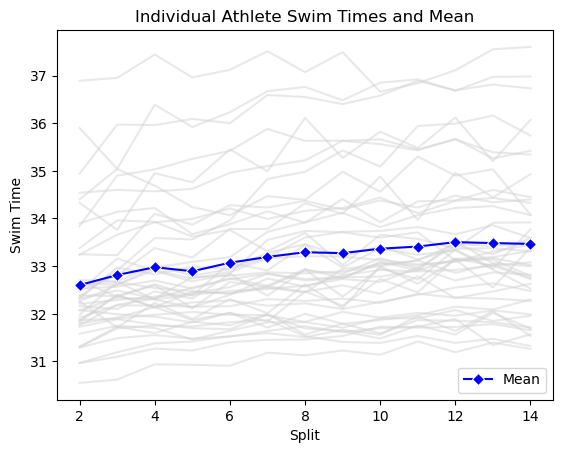

In [46]:
for id in women_split_df['athleteid'].unique():
    sns.lineplot(data=women_split_df[women_split_df['athleteid']==id],x='split',y='swimtime',alpha=0.5,color='lightgrey')

# Calculate the mean swim time for each split
mean_swimtime = women_split_df.groupby('split')['swimtime'].mean().reset_index()

# Add the mean line to the plot
sns.lineplot(data=mean_swimtime, x='split', y='swimtime', color='blue', label='Mean',marker='D')

# Set plot labels and title
plt.xlabel('Split')
plt.ylabel('Swim Time')
plt.title('Individual Athlete Swim Times and Mean')

# Show legend
plt.legend()

# Show the plot
plt.show()

### 5.4 Hypthotesis testing and confidence intervals 

**I will perform a pearson correlation test.**  

**Hyphotesis statement**  
* **Ho:** The null hypothesis is that the two variables, in this case split time and split number, are completely uncorrelated.   
* **H1:** They are actually correlated

In [47]:
grouped = women_split_df.groupby(['athleteid', 'lastname'])
correlation_coeffs = []
p_values = []
athlete_names = []

for group, group_data in grouped:
    split_values = group_data['split']
    swimtime_values = group_data['swimtime']
    
    # Calcula el coeficiente de correlación de Pearson y el valor p
    corr_coeff, p_value = pearsonr(split_values, swimtime_values)
    correlation_coeffs.append(corr_coeff)
    p_values.append(p_value)
    athlete_names.append(group[1])  # Store the athlete's last name
    
    # Imprime los resultados
    print(f"Athlete ID: {group[0]}, Lastname: {group[1]}")
    print(f"Correlation Coefficient: {corr_coeff}")
    print(f"P-value: {p_value}")
    
    if p_value < 0.05:  # Nivel de significancia del 5%
        print("Correlation is statistically significant")
    else:
        print("Correlation is not statistically significant")
    
    print("="*30)

# Calculate the median correlation and median p-value
median_corr = pd.Series(correlation_coeffs).median()
median_p_value = pd.Series(p_values).median()

Athlete ID: 100392, Lastname: ROBINSON
Correlation Coefficient: 0.8725297107297519
P-value: 9.970759862046345e-05
Correlation is statistically significant
Athlete ID: 100550, Lastname: BOYLE
Correlation Coefficient: 0.9450435508091484
P-value: 1.1251888549131623e-06
Correlation is statistically significant
Athlete ID: 100585, Lastname: HASSLER
Correlation Coefficient: 0.8090225357309588
P-value: 0.0008099380706461526
Correlation is statistically significant
Athlete ID: 100648, Lastname: PINTO
Correlation Coefficient: 0.7208516187388935
P-value: 0.00543308307023939
Correlation is statistically significant
Athlete ID: 100753, Lastname: BECK
Correlation Coefficient: 0.3885995516722875
P-value: 0.18943862123729063
Correlation is not statistically significant
Athlete ID: 100882, Lastname: ASHWOOD
Correlation Coefficient: -0.47637358050570405
P-value: 0.09982312850594964
Correlation is not statistically significant
Athlete ID: 101242, Lastname: CHENTSOVA
Correlation Coefficient: 0.3171373403

In [48]:
# Create a DataFrame to hold the correlation, p-value, and athlete names
correlation_data = pd.DataFrame({'Lastname': athlete_names, 'Correlation': correlation_coeffs, 'P-value': p_values})

# Create the scatter plot using Plotly Express
fig = px.scatter(correlation_data, x='P-value', y='Correlation', hover_data=['Lastname'])
fig.update_traces(textposition='top center')  # Position the text label above the point

# Update the layout with appropriate labels and titles
fig.update_layout(
    title="P-values vs Correlation Coefficients",
    xaxis_title="P-value",
    yaxis_title="Correlation Coefficient",
    hovermode='closest'  # Display only the closest hover label
)

fig.update_xaxes(range=[-0.01, 1])

# Show the plot
fig.show()


In [49]:
# Print the median results
print(f"Median Correlation: {median_corr}")
print(f"Median P-value: {median_p_value}")

Median Correlation: 0.795122899118789
Median P-value: 0.001158322065086228


##### **Conclusion:** The p value suggest that there is a significant slow-down between every split of the same swimmer in longer distances (e.g. 800m)

## 6 - Has the lane something to do with the result? - 2013 FINA controversy

### 6.1 Problem Statement

**Introduction**  
in long-course swimming events such as the Olympic Games and other high-level tournaments, turbulent currents or "swirling currents" can indeed impact athletes competing in certain lanes. This is due to how the water flows in the pool and can create unequal conditions for swimmers in different lanes.

Turbulent currents can be caused by various factors, such as water interacting with the pool walls, turbulence generated by swimmers competing in nearby lanes, and the design of the pool itself. This can result in swimmers in certain lanes experiencing additional resistance or, in some cases, even a slight advantage due to the currents.

Before investigating lane bias, it is important to know how a swirling current might affect each lane. It is strongest in the outer lanes, and slowest in the middle. This is akin to swirling a cup of tea. The outsides flow the fastest and the center is not flowing. It is also important to know how swimmers are assigned to lanes. For the finals, the swimmer who was fastest in the semifinal is assigned to lane 4. The next fastest is assigned to lane 5. The next to lane 3, and so on. So, in the absence of current, the swimmers in the center two lanes are expected to be the fastest, but there are typically not major differences among swimmers in the outer lanes.

**Current Swirling Problem in FINA 2013 Championship in Barcelona**  
In those championships in Barcelona, there were anecdotal reports of a very slight, swirling current in the pool. So, for example in a 50 meter event, swimmers in lane 8 would be swimming with the current, while those in lane 1 would be swimming against it.

I am now going to apply some of the same techniques to tackle the so-called Current Controversy of the 2013 World Championships.
For my first analysis, you will look at the 50 meter events, since the swimmers in those events do not turn around. They only swim with or against the putative current. It stands to reason that in a fair pool, we would see athletes swimming in lanes one through three in the finals winning as many medals as those swimming in lanes six through eight. Remember, the top three finishers in the final of each event get medals, so with four strokes and two genders, there are a total of 24 medals awarded in 50 meter events. 

**Medal counts**  
Looking at medals awarded in recent years, there is not a big disparity between high lane numbers and low lane numbers. Except in 2013, when 11 medals were awarded to swimmers in lanes six through eight and only one in lanes one through three. If there is an equal chance of getting a medal in low lane numbers as in high lane numbers, the number of medals in low-numbered lanes is Binomially distributed with probability 0.5.

**Goal**  
I will investigate improvement of individual swimmers moving from low- to high-numbered lanes. I will compute the size of the effect swimming in low versus high lane number has on speed. Finally, I will test the hypothesis that on average there is no difference between low- and high-numbered lanes.

**Metric to use**  
As in the first problem we are going to use the fractional improvement
$$ f = \frac{\text{slow lanes time} - \text{fast lanes time}}{\text{slow lanes time}} $$

In this way It doesn't mind if the athlete is faster or slower than others, just his proper improvement.

**Procedure**
I showed in the previous chapter that there is little difference between semifinal and final performance. As such, I will dismiss any distinctions arising from the transition between semifinals and finals. Instead, I will attribute differences to variations in lanes. I will narrow my focus to the 50m distance, as it is the only event lacking splits, and it involves a single continuous swim across the pool. This isolation of the 50m event will accentuate the impact of any potential currents.

### 6.2 Data preprocessing and preparation

In [50]:
fina_2013.columns

Index(['athleteid', 'lastname', 'firstname', 'birthdate', 'gender', 'name',
       'code', 'eventid', 'heat', 'lane', 'points', 'reactiontime', 'swimtime',
       'split', 'cumswimtime', 'splitdistance', 'daytime', 'round', 'distance',
       'relaycount', 'stroke', 'splitswimtime'],
      dtype='object')

In [51]:
import warnings

# Filter and ignore warnings
warnings.filterwarnings("ignore")

# Filtering for semifinals and 50m
df_semi_50m = fina_2013[(fina_2013['round'] == 'SEM') & (fina_2013['distance']==50)]

# Filtering for finals and 50m
df_finals_50m = fina_2013[(fina_2013['round'] == 'FIN') & (fina_2013['distance']==50)]

# Sorting the DataFrame to get the correct position for each swimtime
df_finals_50m['position'] = df_finals_50m.groupby(['gender', 'stroke'])['swimtime'].rank(method='first')

# Filtering for the top three positions within each group of gender, distance, and stroke
filtered_df = df_finals_50m[df_finals_50m['position'] <= 3]

# Dropping duplicate entries for each athlete in a distance and stroke group
unique_medals_50m = filtered_df.drop_duplicates(subset=['gender', 'lastname', 'stroke'])

# Selecting relevant columns and renaming them for clarity
medals_50m = unique_medals_50m[['gender', 'lastname', 'stroke', 'position', 'lane', 'swimtime']]

# Renaming columns for clarity
medals_50m.columns = ['gender', 'lastname', 'stroke', 'position', 'medal_lane', 'medal_swimtime']

In [52]:
# Getting the times in the final and semifinal for 50m distance
aux = df_finals_50m.merge(df_semi_50m, on=['athleteid', 'lastname', 'gender', 'stroke'], how='left')
FIN_SEM_50 = aux.rename(columns={'lane_x': 'lane_FIN', 'lane_y': 'lane_SEM', 'swimtime_x': 'time_FIN', 'swimtime_y': 'time_SEM'})
FIN_SEM_50 = FIN_SEM_50[['athleteid', 'lastname', 'gender', 'stroke', 'lane_FIN', 'lane_SEM', 'time_FIN', 'time_SEM']]
FIN_SEM_50.head(30)

,athleteid,lastname,gender,stroke,lane_FIN,lane_SEM,time_FIN,time_SEM
0,244099,CAMPBELL,F,FREE,4,4,24.14,24.19
1,245024,SPRENGER,M,BREAST,6,5,26.78,27.10
2,246507,CAMPBELL,F,FREE,2,5,24.66,24.62
3,243926,TSURKIN,M,FLY,3,7,23.28,22.90
4,243873,SANTOS,M,FLY,4,7,23.21,22.81
5,243878,CIELO FILHO,M,FLY,5,6,23.01,22.86
6,243878,CIELO FILHO,M,FREE,6,4,21.32,21.60
7,244013,ORZECHOWSKI,M,BACK,2,4,24.87,24.79
8,244265,MEDEIROS,F,BACK,2,3,27.83,27.89
9,244424,GOMES JUNIOR,M,BREAST,3,6,27.20,27.05


In [53]:
def calculate_times(row):
    if row['lane_FIN'] <= 3 and row['lane_SEM'] >= 5:
        row['time_fast_lane'] = row['time_SEM']
        row['time_slow_lane'] = row['time_FIN']
    elif row['lane_FIN'] >= 6 and row['lane_SEM'] <= 4:
        row['time_slow_lane'] = row['time_SEM']
        row['time_fast_lane'] = row['time_FIN']
    else:
        row['time_fast_lane'] = np.nan
        row['time_slow_lane'] = np.nan
    return row

# Apply the function to each row
times_lanes = FIN_SEM_50.apply(calculate_times, axis=1)[['time_fast_lane','time_slow_lane']]

#dropna
times_lanes=times_lanes.dropna()

display(len(times_lanes))
times_lanes.head(35)

29

,time_fast_lane,time_slow_lane
2,24.62,24.66
3,22.90,23.28
6,21.32,21.60
9,27.05,27.20
10,24.76,24.95
11,27.29,27.87
14,30.31,32.34
16,24.54,24.66
18,26.12,26.17
19,24.58,24.90


In [54]:
# fracional improvement
times_lanes['f']=(times_lanes['time_slow_lane']-times_lanes['time_fast_lane'])/times_lanes['time_slow_lane']

### 6.3 EDA

**Athletes with medals in 50m and respective positions and lanes**

In [55]:
display(medals_50m.sort_values(['gender', 'stroke', 'position']).head(30))
print(f'Medals Quantity in 50m = {len(medals_50m)}')

,gender,lastname,stroke,position,medal_lane,medal_swimtime
1964,F,ZHAO,BACK,1.0,6,27.29
1983,F,FU,BACK,2.0,4,27.39
5741,F,TERAKAWA,BACK,3.0,5,27.53
7876,F,EFIMOVA,BREAST,1.0,5,29.52
6304,F,MEILUTYTE,BREAST,2.0,4,29.59
9131,F,HARDY,BREAST,3.0,3,29.80
2453,F,OTTESEN GRAY,FLY,1.0,4,25.24
2191,F,LU,FLY,2.0,8,25.42
6838,F,KROMOWIDJOJO,FLY,3.0,5,25.53
6841,F,KROMOWIDJOJO,FREE,1.0,5,24.05


Medals Quantity in 50m = 24


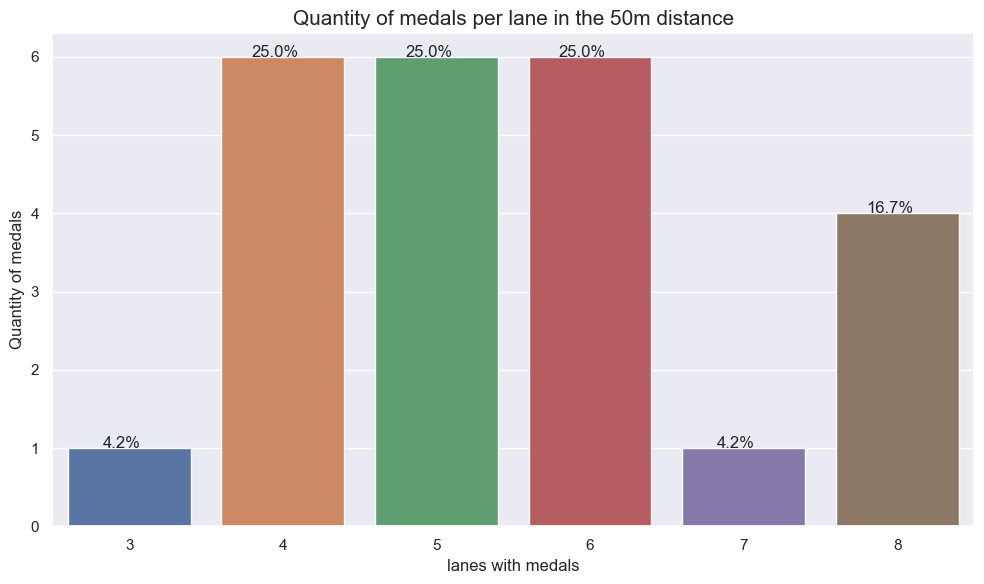

In [56]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
ax = sns.countplot(x="medal_lane", data=medals_50m)

# Calculate and add percentage labels to the bars
total = len(medals_50m)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

# Set plot labels and title
plt.xlabel("lanes with medals")
plt.ylabel("Quantity of medals")
plt.title("Quantity of medals per lane in the 50m distance",fontsize=15)
plt.tight_layout()

# Show the plot
plt.show()

**From the graph we can derive that it could be possible that there was a bias in the high lanes (6-7-8) respect to low lanes (1-2-3)** 

#### Fraccional improvement distribution and ECDF plot

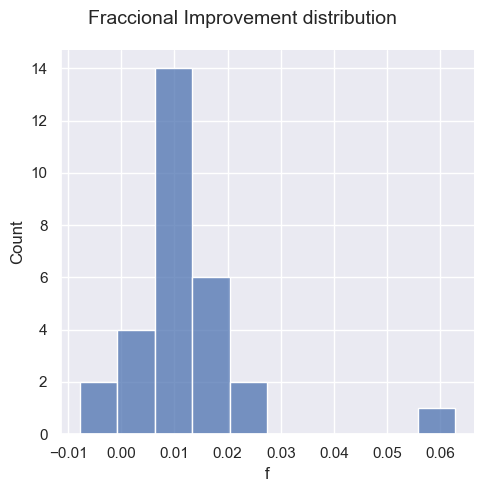

In [57]:
g=sns.displot(times_lanes['f'],bins=10)
g.fig.suptitle('Fraccional Improvement distribution',fontsize=14)
g.fig.subplots_adjust(top=0.9)
plt.show()

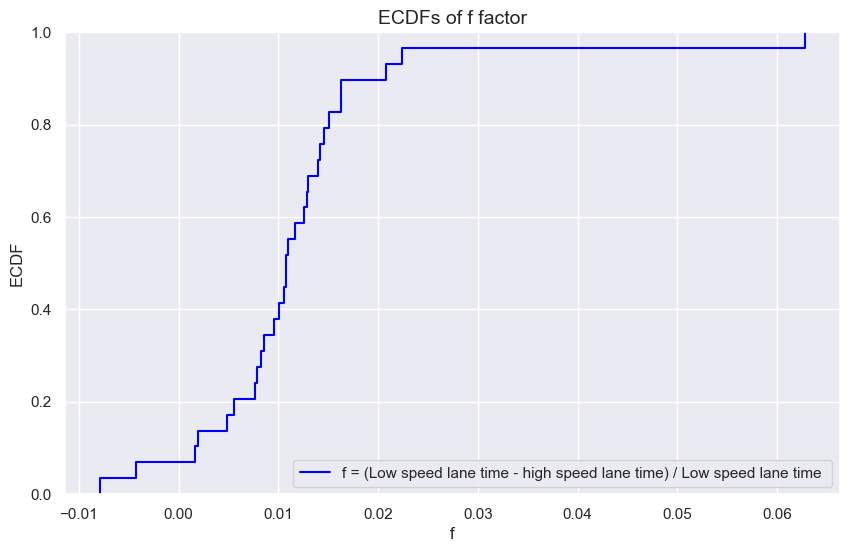

In [58]:
# ECDF
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=times_lanes['f'], label='f = (Low speed lane time - high speed lane time) / Low speed lane time ',c='blue')
plt.ylabel('ECDF')
plt.legend()
plt.title('ECDFs of f factor',fontsize=14)
plt.grid(True)
plt.show()

**In not biased lanes we can expect a aproximately simetrical distribution around zero in the histogram. The same
could be said about the ecdf plot**  
**So again the lanes 6-7-8 appear biased in terms of fractional improvement.**  

We are going to perform a hyphotesis test in the following point

### 6.4 Hypthotesis Testing

**Ho:** The mean of the f coefficient is smaller or equal than zero.

**H1:** The mean of the f coefficient is greater than zero (fast lanes times are significantly greater than slow lanes ones 
                                                           and lanes are biased)

In [59]:
df=times_lanes.copy()

In [60]:
# First we check normality in order to know if we can apply a parametric test
check_normality(df['f'])

p value:0.0000
Reject null hypothesis >> The data is not normally distributed


In [61]:
# As tha data is not normally distributed we Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(df['f'])

alpha = 0.05  # Set the significance level

if p_value < alpha:
    print("The median significantly differs from 0.")
else:
    print("The median does not significantly differ from 0.")

print("Statistic:", statistic)
print("P-value:", p_value)

The median significantly differs from 0.
Statistic: 10.0
P-value: 1.601874828338623e-07


**conclusion** I reject the null hyphotesis because the p value suggest that the fractional improvement is significantly greater than zero

## 7 - Was still the lane influential in the the result in 2015?  
### 2015 FINA lane influential analysis

### 7.1 Problem Statement

I am going to check and test if the same problem with the lanes appeared two years after in the FINA 2015. For further details refer to 6.1

### 7.2 Data preprocessing

In [62]:
import warnings

# Filter and ignore warnings
warnings.filterwarnings("ignore")

# Filtering for semifinals and 50m
df_semi_50m = fina_2015[(fina_2015['round'] == 'SEM') & (fina_2015['distance']==50)]

# Filtering for finals and 50m
df_finals_50m = fina_2015[(fina_2015['round'] == 'FIN') & (fina_2015['distance']==50)]

# Sorting the DataFrame to get the correct position for each swimtime
df_finals_50m['position'] = df_finals_50m.groupby(['gender', 'stroke'])['swimtime'].rank(method='first')

# Filtering for the top three positions within each group of gender, distance, and stroke
filtered_df = df_finals_50m[df_finals_50m['position'] <= 3]

# Dropping duplicate entries for each athlete in a distance and stroke group
unique_medals_50m = filtered_df.drop_duplicates(subset=['gender', 'lastname', 'stroke'])

# Selecting relevant columns and renaming them for clarity
medals_50m = unique_medals_50m[['gender', 'lastname', 'stroke', 'position', 'lane', 'swimtime']]

# Renaming columns for clarity
medals_50m.columns = ['gender', 'lastname', 'stroke', 'position', 'medal_lane', 'medal_swimtime']

# Getting the times in the final and semifinal for 50m distance
aux = df_finals_50m.merge(df_semi_50m, on=['athleteid', 'lastname', 'gender', 'stroke'], how='left')
FIN_SEM_50 = aux.rename(columns={'lane_x': 'lane_FIN', 'lane_y': 'lane_SEM', 'swimtime_x': 'time_FIN', 'swimtime_y': 'time_SEM'})
FIN_SEM_50 = FIN_SEM_50[['athleteid', 'lastname', 'gender', 'stroke', 'lane_FIN', 'lane_SEM', 'time_FIN', 'time_SEM']]
FIN_SEM_50.head(30)

,athleteid,lastname,gender,stroke,lane_FIN,lane_SEM,time_FIN,time_SEM
0,100529,LARKIN,M,BACK,6,5,24.70,24.65
1,100537,CAMPBELL,F,FREE,6,6,24.12,24.32
2,100631,CAMPBELL,F,FREE,4,4,24.36,24.22
3,100715,SEEBOHM,F,BACK,2,5,27.66,27.70
4,105256,WILSON,F,BACK,7,6,27.92,27.83
5,110900,TREFFERS,M,BACK,3,5,24.69,24.64
6,102356,VANDERPOOL-WALLACE,F,FLY,2,3,25.93,25.81
7,102356,VANDERPOOL-WALLACE,F,FREE,2,4,24.44,24.38
8,100523,CIELO FILHO,M,FLY,8,1,23.21,23.29
9,101178,SANTOS,M,FLY,5,3,23.09,23.05


In [63]:
# Getting the times from the athetles that switch lanes

# Apply the function to each row
times_lanes = FIN_SEM_50.apply(calculate_times, axis=1)[['time_fast_lane','time_slow_lane']]

#dropna
times_lanes=times_lanes.dropna()

display(len(times_lanes))
times_lanes.head(20)

16

,time_fast_lane,time_slow_lane
3,27.70,27.66
5,24.64,24.69
8,23.21,23.29
11,26.87,26.87
14,30.74,31.03
25,21.88,22.04
27,24.50,24.51
35,21.86,21.86
36,30.11,30.78
40,25.90,25.64


In [64]:
# fracional improvement
times_lanes['f']=(times_lanes['time_slow_lane']-times_lanes['time_fast_lane'])/times_lanes['time_slow_lane']

### 7.3 EDA

In [65]:
# fracional improvement
times_lanes['f']=(times_lanes['time_slow_lane']-times_lanes['time_fast_lane'])/times_lanes['time_slow_lane']

**Athletes with medals in 50m and respective positions and lanes**

In [66]:
display(medals_50m.sort_values(['gender', 'stroke', 'position']).head(30))
print(f'Medals Quantity in 50m = {len(medals_50m)}')

,gender,lastname,stroke,position,medal_lane,medal_swimtime
1869,F,FU,BACK,1.0,4,27.11
1294,F,MEDEIROS,BACK,2.0,5,27.26
2208,F,LIU,BACK,3.0,6,27.58
9829,F,JOHANSSON,BREAST,1.0,6,30.05
6250,F,ATKINSON,BREAST,2.0,7,30.11
8859,F,EFIMOVA,BREAST,3.0,5,30.13
9805,F,SJOSTROM,FLY,1.0,4,24.96
3027,F,OTTESEN,FLY,2.0,5,25.34
1915,F,LU,FLY,3.0,6,25.37
308,F,CAMPBELL,FREE,1.0,6,24.12


Medals Quantity in 50m = 24


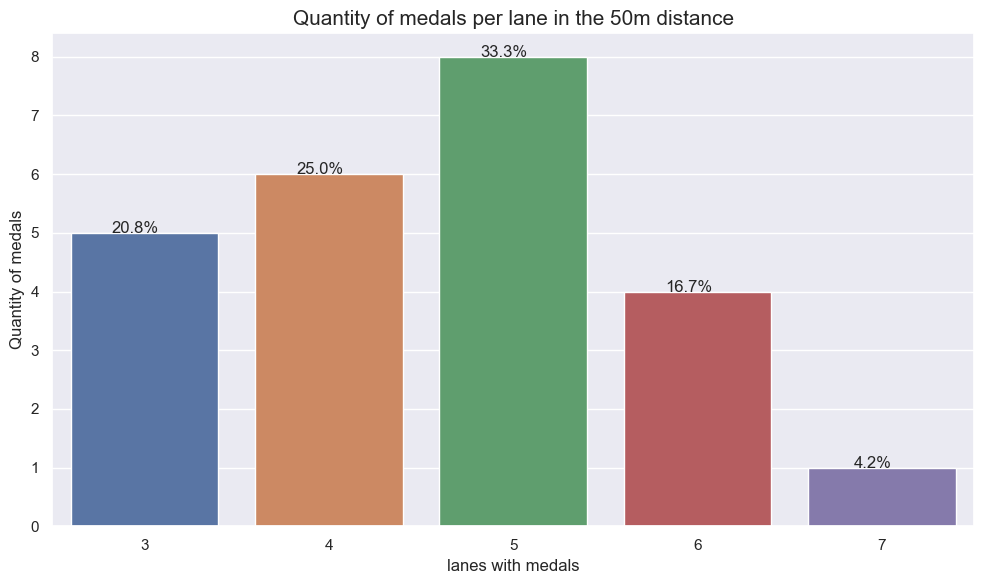

In [67]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
ax = sns.countplot(x="medal_lane", data=medals_50m)

# Calculate and add percentage labels to the bars
total = len(medals_50m)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

# Set plot labels and title
plt.xlabel("lanes with medals")
plt.ylabel("Quantity of medals")
plt.title("Quantity of medals per lane in the 50m distance",fontsize=15)
plt.tight_layout()

# Show the plot
plt.show()

**The graph shows a more balanced distribution of medals in the high lanes (6-7-8) respect to low lanes (1-2-3) compared to the 2013 Championship** 

#### Fraccional improvement distribution and ECDF plot

<Figure size 800x400 with 0 Axes>

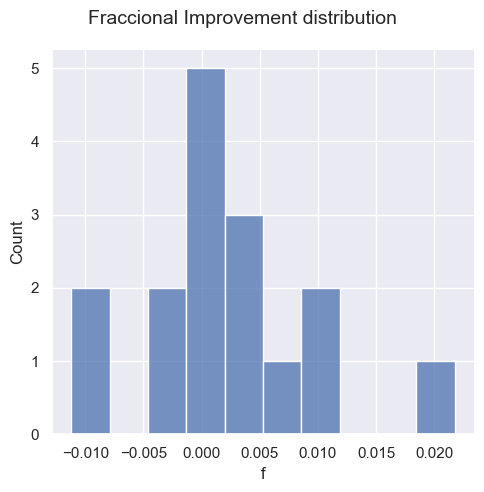

In [68]:
plt.figure(figsize=(8,4))
g=sns.displot(times_lanes['f'],bins=10)
g.fig.suptitle('Fraccional Improvement distribution',fontsize=14)
g.fig.subplots_adjust(top=0.9)
plt.show()

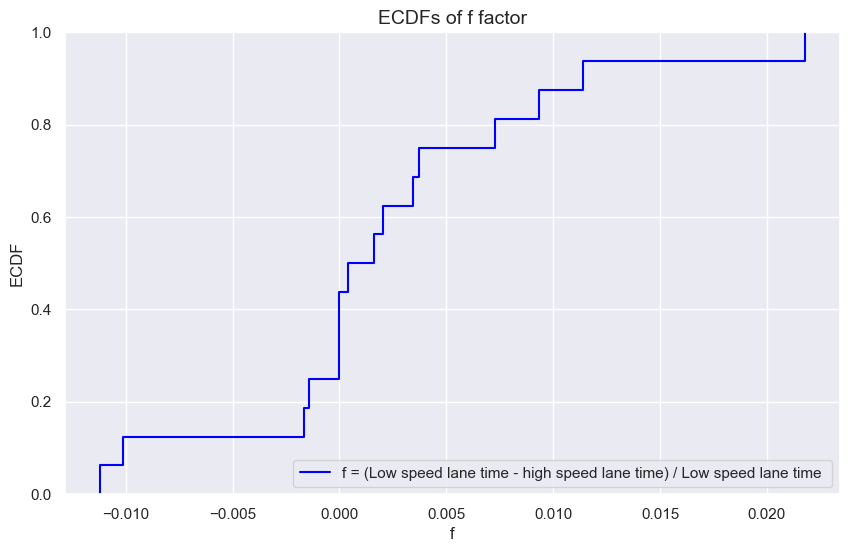

In [69]:
# ECDF
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=times_lanes['f'], label='f = (Low speed lane time - high speed lane time) / Low speed lane time ',c='blue')
plt.ylabel('ECDF')
plt.legend()
plt.title('ECDFs of f factor',fontsize=14)
plt.grid(True)
plt.show()

**Both the ECDF and the histogram suggest that the data is more simetrically distributed compared to 2013**.   
Although There still appear to exist a slight bias toward faster lanes, we are going to see if it is significant statistically speaking

### 7.4 Hypthotesis Testing

**Ho:** The mean of the f coefficient is smaller or equal than zero.

**H1:** The mean of the f coefficient is greater than zero (fast lanes times are significantly greater than slow lanes ones 
                                                           and lanes are biased)

In [70]:
df=times_lanes.copy()

# First we check normality in order to know if we can apply a parametric test
check_normality(df['f'])

p value:0.1933
Fail to reject null hypothesis >> The data is normally distributed


In [71]:
# The data is normally distributed but because of the low quantity of samples we Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(df['f'])

alpha = 0.05  # Set the significance level

if p_value < alpha:
    print("The median significantly differs from 0.")
else:
    print("The median does not significantly differ from 0.")

print("Statistic:", statistic)
print("P-value:", p_value)

The median does not significantly differ from 0.
Statistic: 27.0
P-value: 0.1960509634811064


**conclusion** I accept the null hyphotesis because the p value suggest that the fractional improvement is not significantly greater than zero